In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import math

from Bio import SeqIO

# Waltz data split

In [2]:
data_dir = '/novo/projects/departments/cdd/molecular_ai/mlbp/data/fibrillation_data'

In [3]:
path = f'{data_dir}/sbxw_fibrillation_peptide_waltzdb.csv'
waltz_df = pd.read_csv(path,index_col=0)
print(waltz_df.shape)
display(waltz_df.groupby('value_bool').size())
display(waltz_df.groupby(['data_split','value_bool']).size())
print(waltz_df.sequence.nunique())
waltz_df = waltz_df.drop(columns='data_split')
waltz_df['group'] = ''
waltz_df.head()

(1399, 3)


value_bool
False    892
True     507
dtype: int64

data_split  value_bool
test        False         177
            True          100
train       False         715
            True          407
dtype: int64

1399


,sequence,value_bool,group
0,STVPIE,False,
1,GVIWIA,True,
2,LATVYA,False,
3,NATAHQ,False,
4,STVGIE,False,


In [4]:
# shuffle and split into 5 folds
# Section 2.1.1
waltz_df = waltz_df.sample(frac=1,random_state=42).reset_index(drop=True)

# split the dataset into 5 batches
n_batches = 5
n_subset = math.ceil(len(waltz_df)/n_batches)
waltz_df['fold'] = 1+waltz_df.index//n_subset
display(waltz_df.groupby('fold').size())
waltz_df.head()

fold
1    280
2    280
3    280
4    280
5    279
dtype: int64

,sequence,value_bool,group,fold
0,ESNTNN,False,,1
1,RLVFID,False,,1
2,MGNNTV,False,,1
3,GGNSAL,False,,1
4,LVFYQQ,True,,1


In [5]:
# create a new column for each fold
for i in sorted(list(waltz_df.fold.unique())):
    col_name = f'data_split_fold{i}'
    waltz_df[col_name] = waltz_df['fold'].apply(lambda x: 'val' if x == i else 'train')
    print(f'Split: {i}')
    print('Validation indices:',waltz_df[waltz_df[col_name]=='val'].index)
waltz_df.head()

Split: 1
Validation indices: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279],
      dtype='int64', length=280)
Split: 2
Validation indices: Index([280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
       ...
       550, 551, 552, 553, 554, 555, 556, 557, 558, 559],
      dtype='int64', length=280)
Split: 3
Validation indices: Index([560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
       ...
       830, 831, 832, 833, 834, 835, 836, 837, 838, 839],
      dtype='int64', length=280)
Split: 4
Validation indices: Index([ 840,  841,  842,  843,  844,  845,  846,  847,  848,  849,
       ...
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119],
      dtype='int64', length=280)
Split: 5
Validation indices: Index([1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129,
       ...
       1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398],
      dtype='int64', length=279)


,sequence,value_bool,group,fold,data_split_fold1,data_split_fold2,data_split_fold3,data_split_fold4,data_split_fold5
0,ESNTNN,False,,1,val,train,train,train,train
1,RLVFID,False,,1,val,train,train,train,train
2,MGNNTV,False,,1,val,train,train,train,train
3,GGNSAL,False,,1,val,train,train,train,train
4,LVFYQQ,True,,1,val,train,train,train,train


# Serrano data

In [6]:
path = '/novo/projects/departments/cdd/public/users/ehec/wi25/250412_serrano_with_mutations.csv'
serrano_df = pd.read_csv(path)
serrano_df.dataset = serrano_df.dataset.replace({'cleaned_S1_41587_2004_BFnbt1012_MOESM2_ESM':'serrano_1',
                                                 'cleaned_S2_41587_2004_BFnbt1012_MOESM3_ESM':'serrano_2'})
serrano_df['group'] = serrano_df.dataset
serrano_df['fold'] = -1
serrano_df = serrano_df.drop(columns='dataset')
serrano_df = serrano_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
serrano_df = serrano_df.rename(columns={'exp_aggregation':'value_bool',
                                        'seq':'sequence'})
serrano_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein       248 non-null    object 
 1   name                 248 non-null    object 
 2   sequence             248 non-null    object 
 3   value_bool           248 non-null    int64  
 4   tango_pred           248 non-null    int64  
 5   exp_method           177 non-null    object 
 6   concentration_range  177 non-null    object 
 7   pH                   3 non-null      float64
 8   n_mutations          243 non-null    float64
 9   group                248 non-null    object 
 10  fold                 248 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 21.4+ KB


In [7]:
serrano_df[serrano_df.n_mutations.isna()]

,parent_protein,name,sequence,value_bool,tango_pred,exp_method,concentration_range,pH,n_mutations,group,fold
9,t-Protein,K19Gluc42,VKSE,0,0,"ThS, CD, FTIR",1-100uM,NaN,NaN,serrano_1,-1
38,Amyloid beta A4 peptide,AB1,KLVFF,0,0,ThT,200uM,NaN,NaN,serrano_1,-1
86,Myohemerithrin,AB-loop,RDNSA,0,0,"CD, NMR",3uM-5mM,NaN,NaN,serrano_1,-1
96,French bean Plastocyanin,Pc-4,SEFSV,0,0,"CD, NMR",3uM-5mM,NaN,NaN,serrano_1,-1
110,French bean Plastocyanin,Pc-13b,APGET,0,0,"CD, NMR",3uM-5mM,NaN,NaN,serrano_1,-1


In [8]:
serrano_df = serrano_df[~serrano_df.n_mutations.isna()].copy(deep=True)
serrano_df['n_mutations'] = serrano_df['n_mutations'].astype(int)
serrano_df['seq_aa_length'] = serrano_df['sequence'].apply(lambda x: len(x))
serrano_df

,parent_protein,name,sequence,value_bool,tango_pred,exp_method,concentration_range,pH,n_mutations,group,fold,seq_aa_length
0,t-Protein,K19,PGGGKVQIVYKPV,1,2,"ThS, CD, FTIR",1-100uM,NaN,0,serrano_1,-1,13
1,t-Protein,K19d,PGGGKVYKPV,0,0,"ThS, CD, FTIR",1-100uM,NaN,2,serrano_1,-1,10
2,t-Protein,Mut1,PGGGKNAEVYKPV,0,0,"ThS, CD, FTIR",1-100uM,NaN,2,serrano_1,-1,13
3,t-Protein,Mut2,PGGGKVQIVEKPV,0,0,"ThS, CD, FTIR",1-100uM,NaN,0,serrano_1,-1,13
4,t-Protein,K19Chym,QTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIVY,0,0,"ThS, CD, FTIR",1-100uM,NaN,2,serrano_1,-1,36
...,...,...,...,...,...,...,...,...,...,...,...,...
243,B-microglobulin,64-73,YLLYYTEFTP,1,2,NaN,NaN,NaN,0,serrano_2,-1,10
244,B-microglobulin,69-78,TEFTPTEKDE,1,0,NaN,NaN,NaN,0,serrano_2,-1,10
245,B-microglobulin,74-83,TEKDEYACRV,0,0,NaN,NaN,NaN,0,serrano_2,-1,10
246,B-microglobulin,79-88,YACRVNHVTL,0,0,NaN,NaN,NaN,0,serrano_2,-1,10


group      n_mutations  value_bool
serrano_1  0            0             10
                        1             26
           1            0              7
                        1              8
           2            0             55
                        1             23
           3            0             33
                        1              8
           4            0              2
serrano_2  0            0             17
                        1              9
           1            0              1
           2            0             13
           3            0             28
                        1              2
           4            0              1
dtype: int64

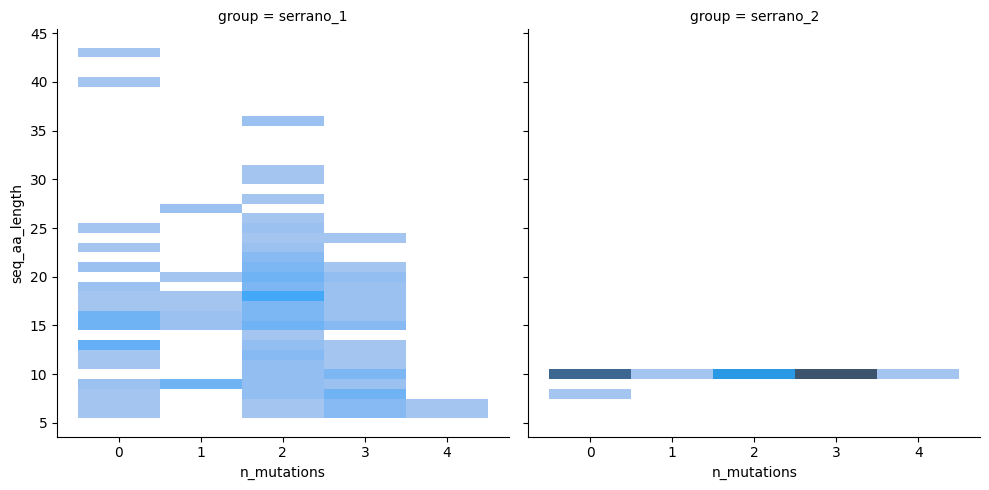

In [9]:
sns.displot(data=serrano_df,x='n_mutations',y='seq_aa_length',col='group',discrete=True)
serrano_df.groupby(['group','n_mutations','value_bool']).size()

In [10]:
print(len(serrano_df))
filt_serrano_df = serrano_df[serrano_df['n_mutations']>0][['sequence','value_bool','parent_protein','name','exp_method','concentration_range','group','fold']].copy(deep=True)
print(len(filt_serrano_df))
filt_serrano_df.head()

243
181


,sequence,value_bool,parent_protein,name,exp_method,concentration_range,group,fold
1,PGGGKVYKPV,0,t-Protein,K19d,"ThS, CD, FTIR",1-100uM,serrano_1,-1
2,PGGGKNAEVYKPV,0,t-Protein,Mut1,"ThS, CD, FTIR",1-100uM,serrano_1,-1
4,QTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIVY,0,t-Protein,K19Chym,"ThS, CD, FTIR",1-100uM,serrano_1,-1
5,KPVDLSKVTSKCGSLGNIHHKPGGGQVEVKSEKLDF,0,t-Protein,K19Chym1,"ThS, CD, FTIR",1-100uM,serrano_1,-1
6,KDRVQSKIGSLDNITHVPGGGN,0,t-Protein,K19Chym2,"ThS, CD, FTIR",1-100uM,serrano_1,-1


In [11]:
sorted(x for x in waltz_df.columns if 'data_split_fold' in x)

['data_split_fold1',
 'data_split_fold2',
 'data_split_fold3',
 'data_split_fold4',
 'data_split_fold5']

In [12]:
for col in sorted(x for x in waltz_df.columns if 'data_split_fold' in x):
    filt_serrano_df[col] = 'test'
filt_serrano_df

,sequence,value_bool,parent_protein,name,exp_method,concentration_range,group,fold,data_split_fold1,data_split_fold2,data_split_fold3,data_split_fold4,data_split_fold5
1,PGGGKVYKPV,0,t-Protein,K19d,"ThS, CD, FTIR",1-100uM,serrano_1,-1,test,test,test,test,test
2,PGGGKNAEVYKPV,0,t-Protein,Mut1,"ThS, CD, FTIR",1-100uM,serrano_1,-1,test,test,test,test,test
4,QTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIVY,0,t-Protein,K19Chym,"ThS, CD, FTIR",1-100uM,serrano_1,-1,test,test,test,test,test
5,KPVDLSKVTSKCGSLGNIHHKPGGGQVEVKSEKLDF,0,t-Protein,K19Chym1,"ThS, CD, FTIR",1-100uM,serrano_1,-1,test,test,test,test,test
6,KDRVQSKIGSLDNITHVPGGGN,0,t-Protein,K19Chym2,"ThS, CD, FTIR",1-100uM,serrano_1,-1,test,test,test,test,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,VRDPQGIRAW,0,human lysozyme,100-109,NaN,NaN,serrano_2,-1,test,test,test,test,test
228,GIRAWVAWRN,0,human lysozyme,105-114,NaN,NaN,serrano_2,-1,test,test,test,test,test
229,VAWRNRCQNR,0,human lysozyme,110-119,NaN,NaN,serrano_2,-1,test,test,test,test,test
230,RCQNRDVRQY,0,human lysozyme,115-124,NaN,NaN,serrano_2,-1,test,test,test,test,test


# Standard dataset

In [55]:
concat_df = pd.concat([waltz_df,filt_serrano_df],ignore_index=True)
concat_df.info()
concat_df.to_csv(f'datasets/sbxw_fibrillation_peptide_waltzdb-5fold_train-val_serrano-test.csv')
concat_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sequence             1580 non-null   object
 1   value_bool           1580 non-null   int64 
 2   group                1580 non-null   object
 3   fold                 1580 non-null   int64 
 4   data_split_fold1     1580 non-null   object
 5   data_split_fold2     1580 non-null   object
 6   data_split_fold3     1580 non-null   object
 7   data_split_fold4     1580 non-null   object
 8   data_split_fold5     1580 non-null   object
 9   parent_protein       181 non-null    object
 10  name                 181 non-null    object
 11  exp_method           136 non-null    object
 12  concentration_range  136 non-null    object
dtypes: int64(2), object(11)
memory usage: 160.6+ KB


,sequence,value_bool,group,fold,data_split_fold1,data_split_fold2,data_split_fold3,data_split_fold4,data_split_fold5,parent_protein,name,exp_method,concentration_range
0,ESNTNN,0,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
1,RLVFID,0,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
2,MGNNTV,0,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
3,GGNSAL,0,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
4,LVFYQQ,1,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,VRDPQGIRAW,0,serrano_2,-1,test,test,test,test,test,human lysozyme,100-109,NaN,NaN
1576,GIRAWVAWRN,0,serrano_2,-1,test,test,test,test,test,human lysozyme,105-114,NaN,NaN
1577,VAWRNRCQNR,0,serrano_2,-1,test,test,test,test,test,human lysozyme,110-119,NaN,NaN
1578,RCQNRDVRQY,0,serrano_2,-1,test,test,test,test,test,human lysozyme,115-124,NaN,NaN


# AggreProt reimplementation

In [57]:
aggreprot_df = concat_df.copy(deep=True)
aggreprot_df = aggreprot_df[aggreprot_df['fold']!=-1]
temp_waltz_df = waltz_df[waltz_df['fold']==1].copy(deep=True)
temp_waltz_df['data_split_fold1'] = 'test'
temp_waltz_df['data_split_fold2'] = 'test'
temp_waltz_df['data_split_fold3'] = 'test'
temp_waltz_df['data_split_fold4'] = 'test'
temp_waltz_df['data_split_fold5'] = 'test'
aggreprot_df = pd.concat([aggreprot_df,temp_waltz_df],ignore_index=True)
aggreprot_df.to_csv(f'datasets/sbxw_fibrillation_peptide_waltzdb-5fold_train-val_waltzfold1-test_foraggreprot.csv')
aggreprot_df

,sequence,value_bool,group,fold,data_split_fold1,data_split_fold2,data_split_fold3,data_split_fold4,data_split_fold5,parent_protein,name,exp_method,concentration_range
0,ESNTNN,0,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
1,RLVFID,0,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
2,MGNNTV,0,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
3,GGNSAL,0,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
4,LVFYQQ,1,,1,val,train,train,train,train,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,GNNSGP,0,,1,test,test,test,test,test,NaN,NaN,NaN,NaN
1675,GMLASR,0,,1,test,test,test,test,test,NaN,NaN,NaN,NaN
1676,GYVIIK,1,,1,test,test,test,test,test,NaN,NaN,NaN,NaN
1677,GYCFIL,1,,1,test,test,test,test,test,NaN,NaN,NaN,NaN


# Padding dataset

Problem: predictors trained on waltzDB dataset sequences, which are all 6 amino acids, can be not be used to classify longer sequences.

Hypothesis: ESM embeddings have a significant length-dependence, e.g. the values in the embedding vectors vary as a function of the length of the sequence. 

Idea: "augment" the sequences in waltzDB by randomly sampling "padding" sequence on the N and C terminus.
- Glycine only, [1-15] residues on either N/C-terminus, 30 residues on either terminus total
- Non-hydrophobic residues (not A,V,I,L,M,W,Y,F), same length distribution

Add serrano s1 sequences, padding if < 30 amino acids to create combined dataset for training

Use serrano s2 sequences for testing and original waltz sequences for testing

# Defining functions

In [14]:
'acdefghiklmnpqrstvwy'.upper()

'ACDEFGHIKLMNPQRSTVWY'

In [15]:
def sampleString(
    charSet,
    length
):
    return ''.join([random.choice(charSet) for _ in range(length)])

def padSequence(
    sequence:str,
    terminal_residue_id:str='gly', #or non-hydrophobic
    n_terminal_residues:tuple=(1,15) #inclusive
):
    
    gly = 'G'
    nonhydrophobic = 'CDEGHKNPQRST'
    
    n_res_nterm = random.randint(*n_terminal_residues)
    n_res_cterm = random.randint(*n_terminal_residues)

    if terminal_residue_id == 'gly':
        padded_seq = sampleString(gly,n_res_nterm)+sequence+sampleString(gly,n_res_cterm)
    elif terminal_residue_id == 'non-hydrophobic':
        padded_seq = sampleString(nonhydrophobic,n_res_nterm)+sequence+sampleString(nonhydrophobic,n_res_cterm)
    else:
        raise ValueError(f"terminal_residue_id == {terminal_residue_id} not recognized")

    mask = ''.join([str(0)]*n_res_nterm+[str(1)]*len(sequence)+[str(0)]*n_res_cterm)
    return padded_seq,mask

random.seed(42)

padSequence('STVPIE','gly')

('GGGGGGGGGGGSTVPIEGG', '0000000000011111100')

In [18]:
comb_df = pd.read_csv(f'datasets/sbxw_fibrillation_peptide_waltzdb-5fold_train-val_serrano-test.csv',index_col=0)
comb_df

,sequence,value_bool,group,fold,data_split_fold1,data_split_fold2,data_split_fold3,data_split_fold4,data_split_fold5,parent_protein,name,exp_method,concentration_range
0,ESNTNN,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN
1,RLVFID,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN
2,MGNNTV,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN
3,GGNSAL,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN
4,LVFYQQ,1,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,VRDPQGIRAW,0,serrano_2,-1,test,test,test,test,test,human lysozyme,100-109,NaN,NaN
1576,GIRAWVAWRN,0,serrano_2,-1,test,test,test,test,test,human lysozyme,105-114,NaN,NaN
1577,VAWRNRCQNR,0,serrano_2,-1,test,test,test,test,test,human lysozyme,110-119,NaN,NaN
1578,RCQNRDVRQY,0,serrano_2,-1,test,test,test,test,test,human lysozyme,115-124,NaN,NaN


# Rand-padded, 10X (pad 10)

In [28]:
pad_max_len = 10
coverage = 10
random.seed(42)
data = list()
for i,row in comb_df.iterrows():
    if row['fold'] == -1: # test sequences are not padded
        row_dict = dict(row)
        row_dict['mask'] = ''.join(['1']*len(row['sequence']))
        row_dict['core_sequence'] = row['sequence']
        data.append(row_dict)
    else:
        for j in range(coverage):
            row_dict = dict(row)
            row_dict['sequence'],row_dict['mask'] = padSequence(row.sequence,'non-hydrophobic',(1,pad_max_len))
            row_dict['core_sequence'] = row['sequence']
            data.append(row_dict)
rand_padded_waltz_df = pd.DataFrame(data)
rand_padded_waltz_df['len'] = rand_padded_waltz_df['sequence'].apply(len)
rand_padded_waltz_df.to_csv(f"datasets/sbxw_fibrillation_peptide_waltzdb-5fold_train-val_serrano-test_randpadded10x_padlen-{pad_max_len}.csv")
rand_padded_waltz_df

,sequence,value_bool,group,fold,data_split_fold1,data_split_fold2,data_split_fold3,data_split_fold4,data_split_fold5,parent_protein,name,exp_method,concentration_range,mask,core_sequence,len
0,THESNTNNG,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,001111110,ESNTNN,9
1,TDSTESNTNNQDR,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,0000111111000,ESNTNN,13
2,CDGGQRCESNTNNQ,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,00000001111110,ESNTNN,14
3,NGPRESNTNNHCETNKHEG,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,0000111111000000000,ESNTNN,19
4,DNDKKRESNTNNHC,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,00000011111100,ESNTNN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14166,VRDPQGIRAW,0,serrano_2,-1,test,test,test,test,test,human lysozyme,100-109,NaN,NaN,1111111111,VRDPQGIRAW,10
14167,GIRAWVAWRN,0,serrano_2,-1,test,test,test,test,test,human lysozyme,105-114,NaN,NaN,1111111111,GIRAWVAWRN,10
14168,VAWRNRCQNR,0,serrano_2,-1,test,test,test,test,test,human lysozyme,110-119,NaN,NaN,1111111111,VAWRNRCQNR,10
14169,RCQNRDVRQY,0,serrano_2,-1,test,test,test,test,test,human lysozyme,115-124,NaN,NaN,1111111111,RCQNRDVRQY,10


In [22]:
# check some basic things about it
display(rand_padded_waltz_df.groupby('fold').sequence.nunique())
display(rand_padded_waltz_df.groupby('fold').core_sequence.nunique())

fold
-1     180
 1    2800
 2    2800
 3    2800
 4    2800
 5    2790
Name: sequence, dtype: int64

fold
-1    180
 1    280
 2    280
 3    280
 4    280
 5    279
Name: core_sequence, dtype: int64

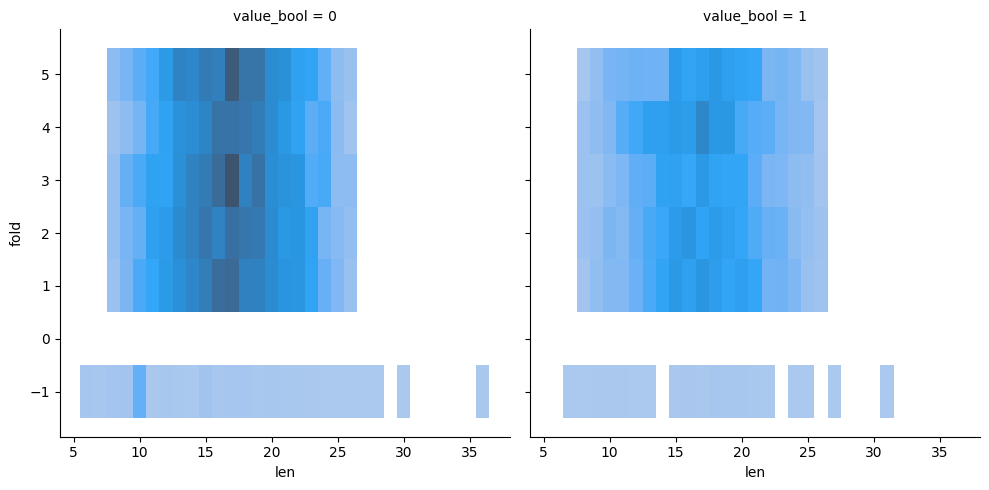

In [27]:
sns.displot(rand_padded_waltz_df,
             x='len',
             col='value_bool',
             y='fold',discrete=True)

# Rand-padded, 10X (pad 5)

In [45]:
pad_max_len = 5
coverage = 10
random.seed(42)
data = list()
for i,row in comb_df.iterrows():
    if row['fold'] == -1: # test data
        row_dict = dict(row)
        row_dict['mask'] = ''.join(['1']*len(row['sequence']))
        row_dict['core_sequence'] = row['sequence']
        data.append(row_dict)
    else:
        for j in range(coverage):
            row_dict = dict(row)
            row_dict['sequence'],row_dict['mask'] = padSequence(row.sequence,'non-hydrophobic',(1,pad_max_len))
            row_dict['core_sequence'] = row['sequence']
            data.append(row_dict)
rand_padded_waltz_df = pd.DataFrame(data)
rand_padded_waltz_df['len'] = rand_padded_waltz_df['sequence'].apply(len)
rand_padded_waltz_df.to_csv(f"datasets/sbxw_fibrillation_peptide_waltzdb-5fold_train-val_serrano-test_randpadded10x_padlen-{pad_max_len}.csv")
rand_padded_waltz_df

,sequence,value_bool,group,fold,data_split_fold1,data_split_fold2,data_split_fold3,data_split_fold4,data_split_fold5,parent_protein,name,exp_method,concentration_range,mask,core_sequence,len
0,TESNTNNH,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,01111110,ESNTNN,8
1,ETESNTNNDS,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,0011111100,ESNTNN,10
2,RNCCDESNTNNG,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,000001111110,ESNTNN,12
3,RCESNTNNQGTST,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,0011111100000,ESNTNN,13
4,GPRHCESNTNNETNK,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,000001111110000,ESNTNN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14166,VRDPQGIRAW,0,serrano_2,-1,test,test,test,test,test,human lysozyme,100-109,NaN,NaN,1111111111,VRDPQGIRAW,10
14167,GIRAWVAWRN,0,serrano_2,-1,test,test,test,test,test,human lysozyme,105-114,NaN,NaN,1111111111,GIRAWVAWRN,10
14168,VAWRNRCQNR,0,serrano_2,-1,test,test,test,test,test,human lysozyme,110-119,NaN,NaN,1111111111,VAWRNRCQNR,10
14169,RCQNRDVRQY,0,serrano_2,-1,test,test,test,test,test,human lysozyme,115-124,NaN,NaN,1111111111,RCQNRDVRQY,10


In [46]:
# check some basic things about it
display(rand_padded_waltz_df.groupby('fold').sequence.nunique())
display(rand_padded_waltz_df.groupby('fold').core_sequence.nunique())

fold
-1     180
 1    2800
 2    2800
 3    2800
 4    2800
 5    2790
Name: sequence, dtype: int64

fold
-1    180
 1    280
 2    280
 3    280
 4    280
 5    279
Name: core_sequence, dtype: int64

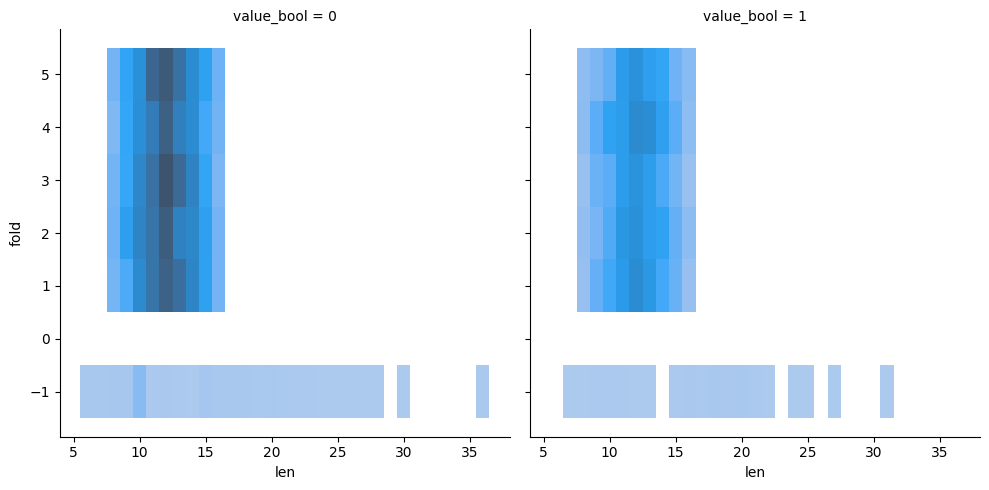

In [47]:
sns.displot(rand_padded_waltz_df,
             x='len',
             col='value_bool',
             y='fold',discrete=True)

# Rand-padded, 10X (pad 20)

In [48]:
pad_max_len = 20
coverage = 10
random.seed(42)
data = list()
for i,row in comb_df.iterrows():
    if row['fold'] == -1:
        row_dict = dict(row)
        row_dict['mask'] = ''.join(['1']*len(row['sequence']))
        row_dict['core_sequence'] = row['sequence']
        data.append(row_dict)
    else:
        for j in range(coverage):
            row_dict = dict(row)
            row_dict['sequence'],row_dict['mask'] = padSequence(row.sequence,'non-hydrophobic',(1,pad_max_len))
            row_dict['core_sequence'] = row['sequence']
            data.append(row_dict)
rand_padded_waltz_df = pd.DataFrame(data)
rand_padded_waltz_df['len'] = rand_padded_waltz_df['sequence'].apply(len)
rand_padded_waltz_df.to_csv(f"datasets/sbxw_fibrillation_peptide_waltzdb-5fold_train-val_serrano-test_randpadded10x_padlen-{pad_max_len}.csv")
rand_padded_waltz_df

,sequence,value_bool,group,fold,data_split_fold1,data_split_fold2,data_split_fold3,data_split_fold4,data_split_fold5,parent_protein,name,exp_method,concentration_range,mask,core_sequence,len
0,THGGESNTNNE,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,00001111110,ESNTNN,11
1,DRNCESNTNNCDGGQRCQGTSTQNGPRH,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,0000111111000000000000000000,ESNTNN,28
2,TESNTNNNKHEGK,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,0111111000000,ESNTNN,13
3,NDKKESNTNNRHC,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,0000111111000,ESNTNN,13
4,DNDQHSRKRGTDCSGESNTNNHDGDNHPSKEKKGSHTSS,0,NaN,1,val,train,train,train,train,NaN,NaN,NaN,NaN,000000000000000111111000000000000000000,ESNTNN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14166,VRDPQGIRAW,0,serrano_2,-1,test,test,test,test,test,human lysozyme,100-109,NaN,NaN,1111111111,VRDPQGIRAW,10
14167,GIRAWVAWRN,0,serrano_2,-1,test,test,test,test,test,human lysozyme,105-114,NaN,NaN,1111111111,GIRAWVAWRN,10
14168,VAWRNRCQNR,0,serrano_2,-1,test,test,test,test,test,human lysozyme,110-119,NaN,NaN,1111111111,VAWRNRCQNR,10
14169,RCQNRDVRQY,0,serrano_2,-1,test,test,test,test,test,human lysozyme,115-124,NaN,NaN,1111111111,RCQNRDVRQY,10


In [49]:
# check some basic things about it
display(rand_padded_waltz_df.groupby('fold').sequence.nunique())
display(rand_padded_waltz_df.groupby('fold').core_sequence.nunique())

fold
-1     180
 1    2800
 2    2800
 3    2800
 4    2800
 5    2790
Name: sequence, dtype: int64

fold
-1    180
 1    280
 2    280
 3    280
 4    280
 5    279
Name: core_sequence, dtype: int64

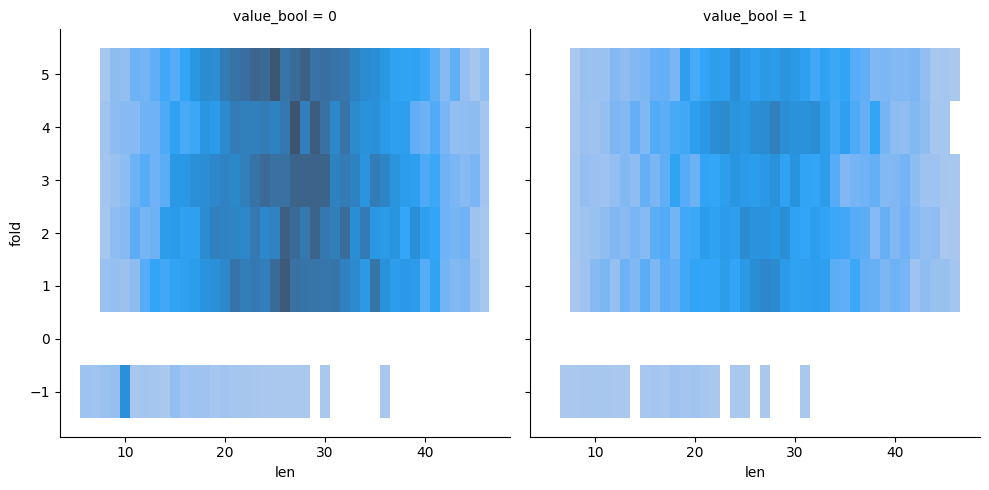

In [50]:
sns.displot(rand_padded_waltz_df,
             x='len',
             col='value_bool',
             y='fold',discrete=True)